In [3]:
import pandas as pd
import matplotlib.pyplot as plt
titanic = pd.read_csv('tested.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
titanic.drop(['PassengerId','Name','Cabin','Ticket'],axis=1,inplace=True)

In [6]:
for c in titanic.columns:
    print(c)
    print('--------------')
    print(titanic[c].value_counts().sort_index())
    print('')

Survived
--------------
0    266
1    152
Name: Survived, dtype: int64

Pclass
--------------
1    107
2     93
3    218
Name: Pclass, dtype: int64

Sex
--------------
female    152
male      266
Name: Sex, dtype: int64

Age
--------------
0.17     1
0.33     1
0.75     1
0.83     1
0.92     1
        ..
62.00    1
63.00    2
64.00    3
67.00    1
76.00    1
Name: Age, Length: 79, dtype: int64

SibSp
--------------
0    283
1    110
2     14
3      4
4      4
5      1
8      2
Name: SibSp, dtype: int64

Parch
--------------
0    324
1     52
2     33
3      3
4      2
5      1
6      1
9      2
Name: Parch, dtype: int64

Fare
--------------
0.0000      2
3.1708      1
6.4375      2
6.4958      1
6.9500      1
           ..
227.5250    1
247.5208    1
262.3750    5
263.0000    2
512.3292    1
Name: Fare, Length: 169, dtype: int64

Embarked
--------------
C    102
Q     46
S    270
Name: Embarked, dtype: int64



In [7]:
import seaborn as sns

In [8]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

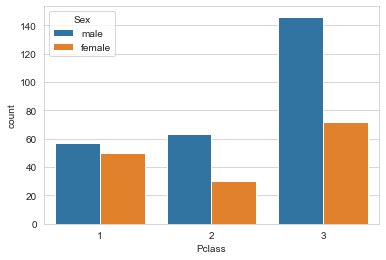

In [9]:
sns.countplot(x='Pclass', data=titanic, hue='Sex')

<AxesSubplot:xlabel='Age', ylabel='Count'>

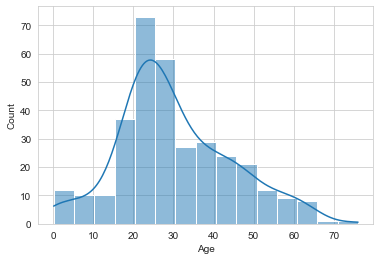

In [10]:
sns.histplot(data=titanic, x='Age', kde=True)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

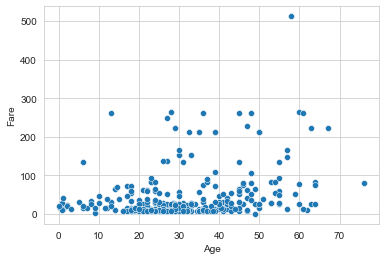

In [11]:
sns.scatterplot(x='Age',y='Fare',data=titanic)

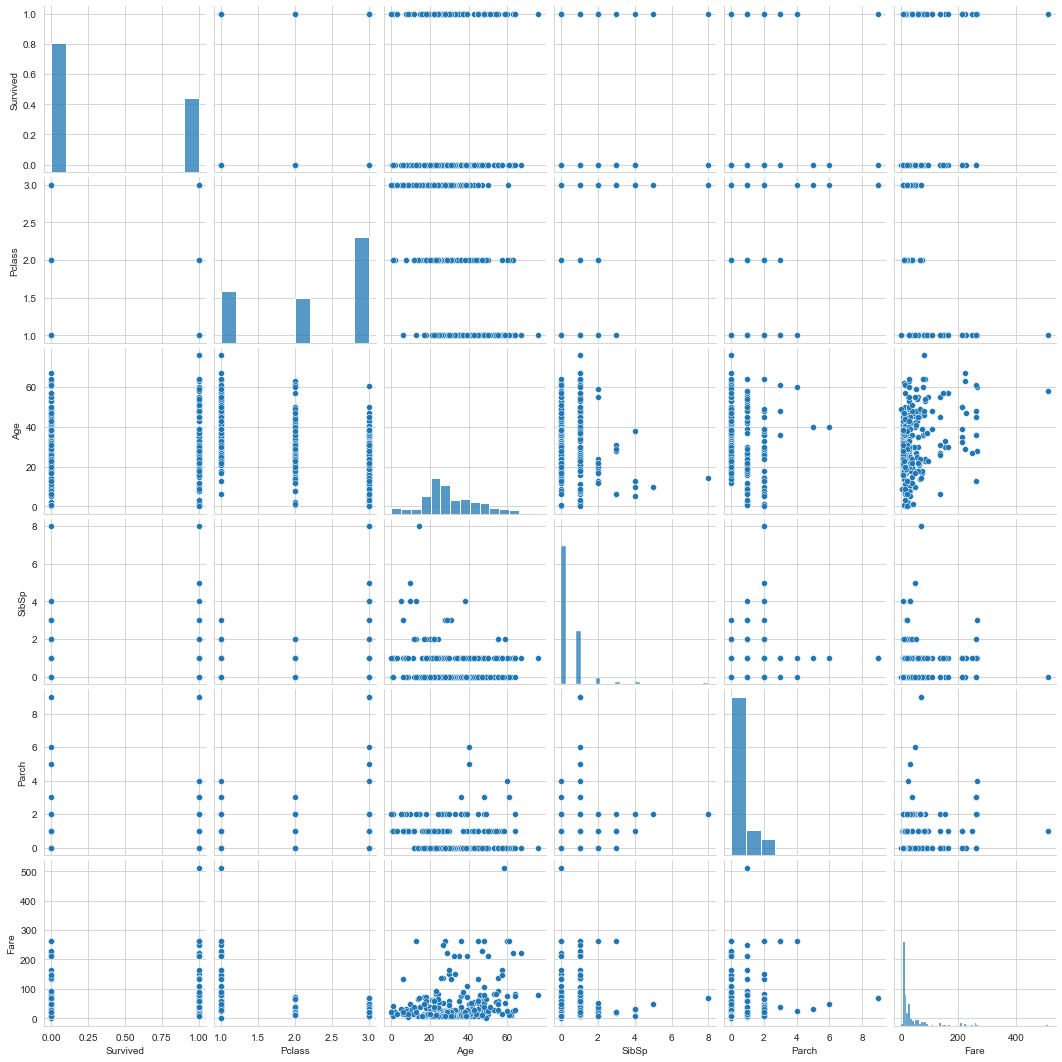

In [12]:
sns.pairplot(titanic)

<AxesSubplot:>

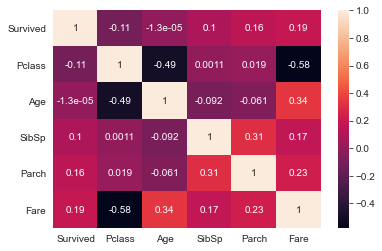

In [13]:
sns.heatmap(titanic.corr(),annot=True)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

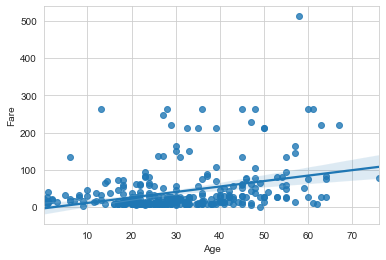

In [14]:
sns.regplot(x='Age',y='Fare',data=titanic,)

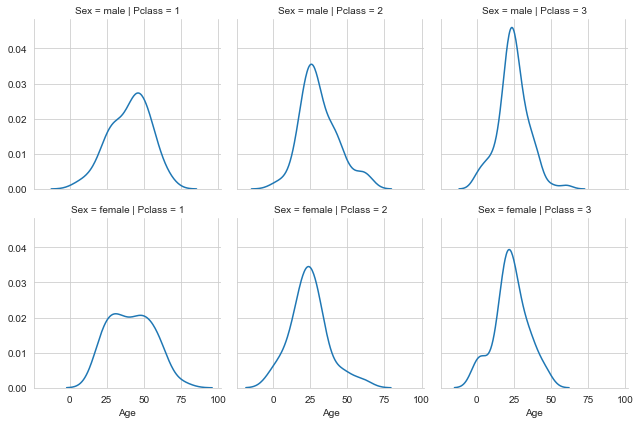

In [15]:
fg = sns.FacetGrid(titanic, row='Sex',col='Pclass')
fg.map(sns.kdeplot, 'Age')

In [16]:
100*pd.isnull(titanic).sum()/len(titanic)

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         20.574163
SibSp        0.000000
Parch        0.000000
Fare         0.239234
Embarked     0.000000
dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

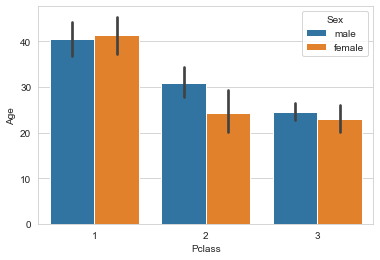

In [17]:
sns.barplot(x='Pclass',y='Age', data=titanic, hue='Sex',ci=95)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

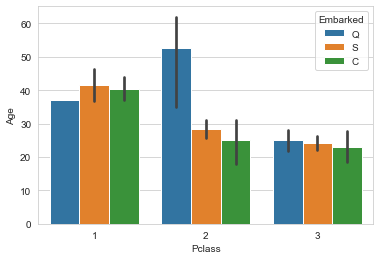

In [18]:
sns.barplot(x='Pclass',y='Age', data=titanic, hue='Embarked')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

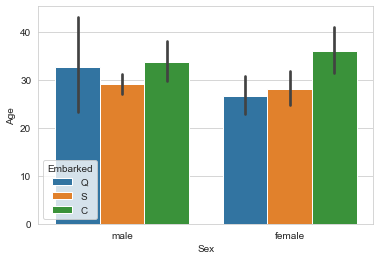

In [19]:
sns.barplot(x='Sex',y='Age', data=titanic, hue='Embarked')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

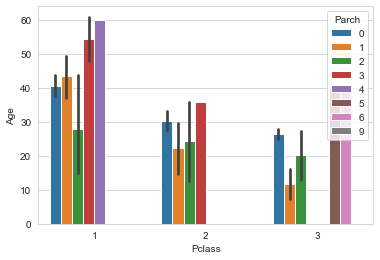

In [20]:
sns.barplot(x='Pclass',y='Age', data=titanic, hue='Parch')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

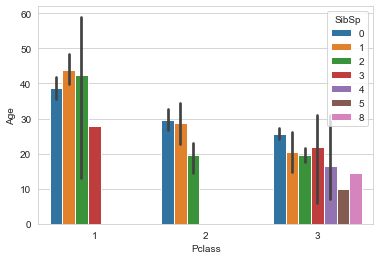

In [21]:
sns.barplot(x='Pclass',y='Age', data=titanic, hue='SibSp')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

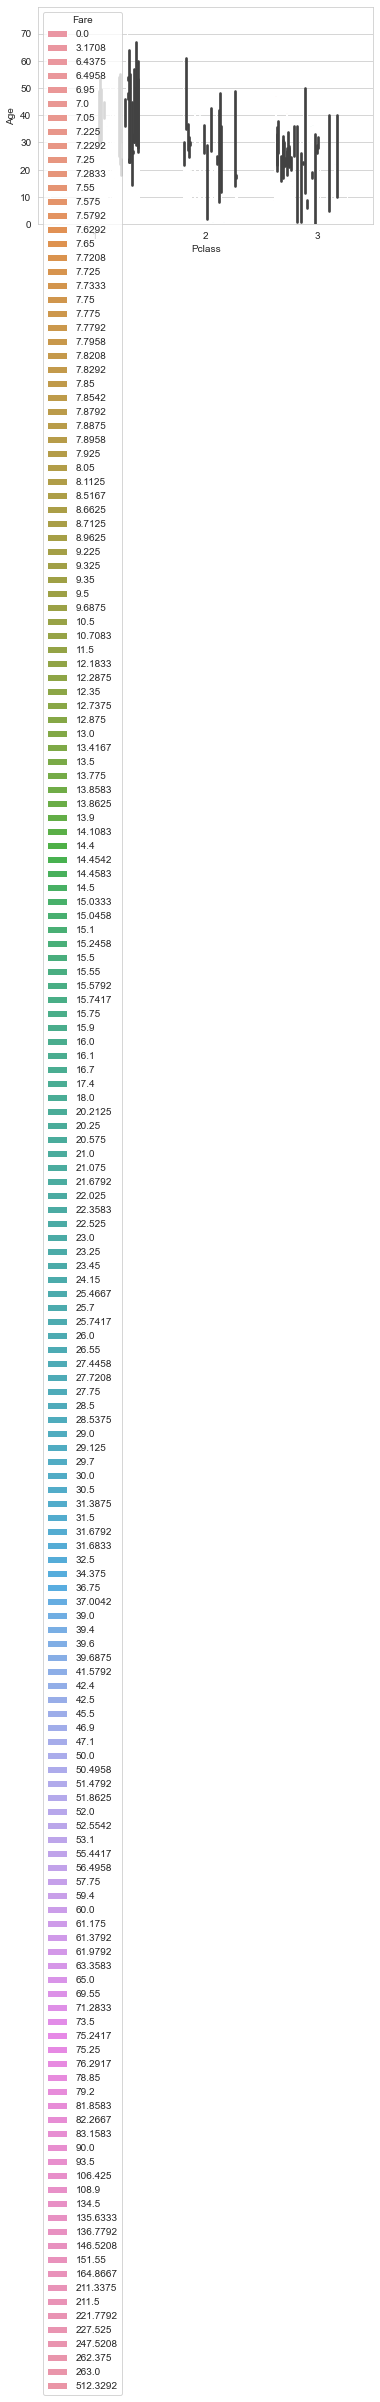

In [22]:
sns.barplot(x='Pclass',y='Age', data=titanic, hue='Fare')

In [23]:
def data_impute(x):
    if pd.isnull(x['Age']):
        return titanic[(titanic['Sex']==x['Sex'])&(titanic['Pclass']==x['Pclass'])]['Age'].mean()
    return x['Age']

In [24]:
titanic['Age'] = titanic[['Sex','Pclass','Age']].apply(data_impute, axis=1)

In [25]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [26]:
titanic.dropna(inplace=True)

In [27]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  417 non-null    int64  
 1   Pclass    417 non-null    int64  
 2   Sex       417 non-null    object 
 3   Age       417 non-null    float64
 4   SibSp     417 non-null    int64  
 5   Parch     417 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  417 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 29.3+ KB
